In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('owid-energy-data.csv')
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21890 entries, 0 to 21889
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.5+ MB


## Data Cleaning - Filtering of columns

We have decided to take the general metric of fossil fuels and renewables rather than coal, gas, oil, nuclear etc.

In addition, we look at relative data for fossil fuel / renewables usage rather than absolute data to make accurate comparisons.

Other data we have included are greenhouse gas emissions, country, iso_code, population.

In [15]:
cols = ['country', 'iso_code', 'year', 'population', 'gdp', 'greenhouse_gas_emissions', 'fossil_fuel_consumption', 'fossil_cons_change_pct', 'fossil_share_energy', 'fossil_share_elec',
        'fossil_elec_per_capita', 'fossil_energy_per_capita', 'renewables_consumption', 'renewables_cons_change_pct', 'renewables_share_energy', 'renewables_share_elec', 
        'renewables_elec_per_capita', 'renewables_energy_per_capita']

In [31]:
df1 = df.loc[:, cols]
df1.head()

,country,iso_code,year,population,gdp,greenhouse_gas_emissions,fossil_fuel_consumption,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,renewables_consumption,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,renewables_elec_per_capita,renewables_energy_per_capita
0,Afghanistan,AFG,1900,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1901,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1902,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1903,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1904,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning - create continent data for comparison

We compare continents for energy usage rather than countries as we are concerned with the overall energy usage.

In addition, countries' economic states vary a lot and time-series forecasting may not work for these countries realistically.

In [30]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
continent_data = df1[df1['country'].isin(continents)]
continent_data.head()

,country,iso_code,year,population,gdp,greenhouse_gas_emissions,fossil_fuel_consumption,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,renewables_consumption,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,renewables_elec_per_capita,renewables_energy_per_capita
122,Africa,NaN,1900,138827369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Africa,NaN,1901,139097937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Africa,NaN,1902,139567767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Africa,NaN,1903,140074606.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Africa,NaN,1904,140595545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
continent_metrics = ['population', 'greenhouse_gas_emissions', 'fossil_fuel_consumption', 
                     'renewables_consumption', 'fossil_cons_change_pct', 'renewables_cons_change_pct',
                     'fossil_share_energy', 'renewables_share_energy']

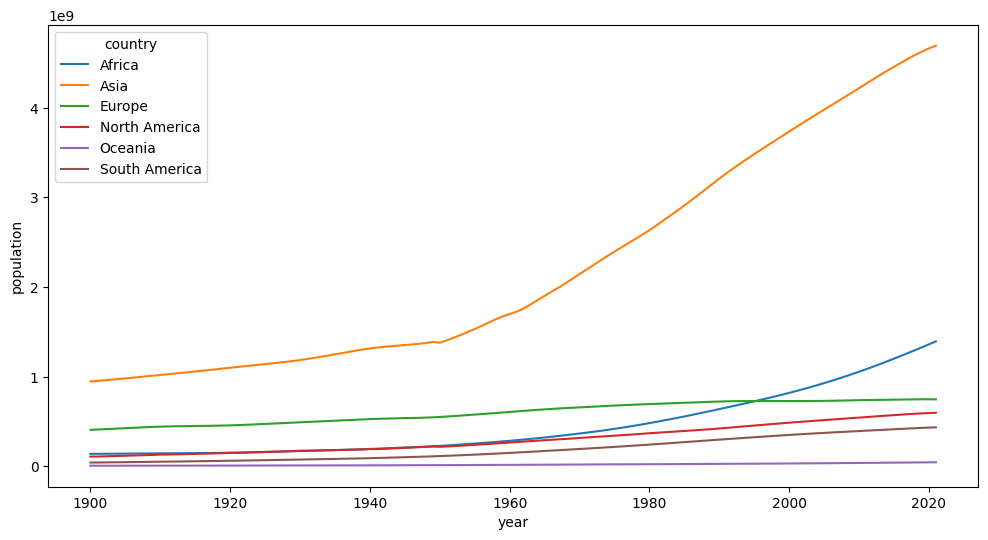

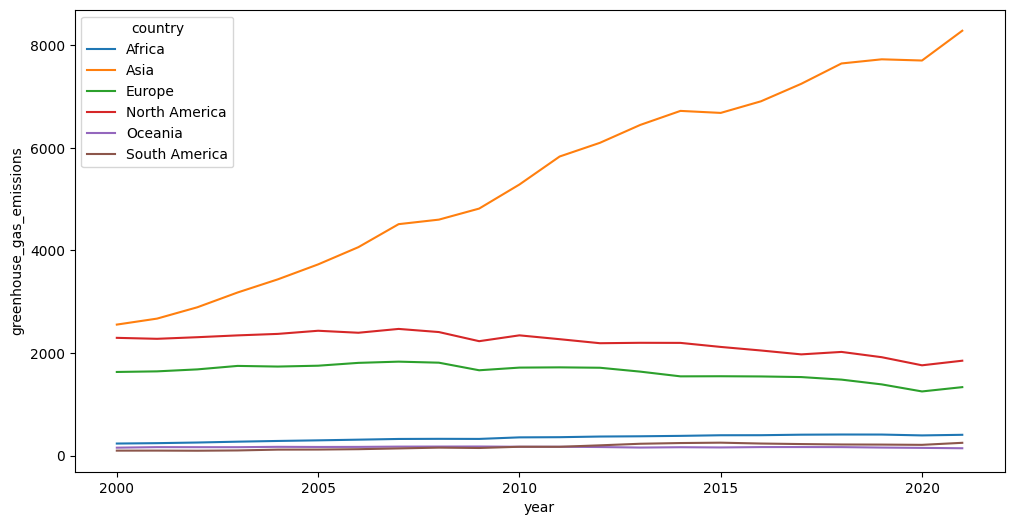

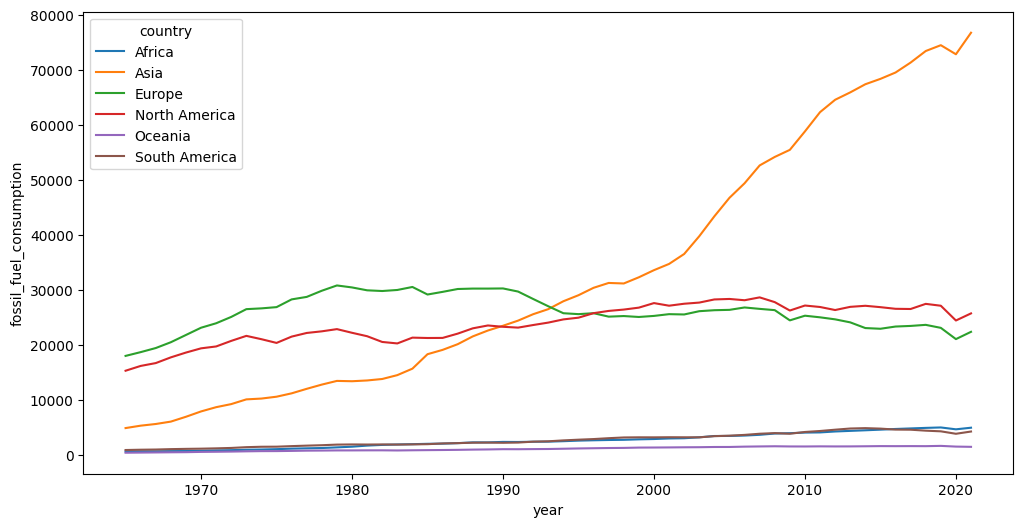

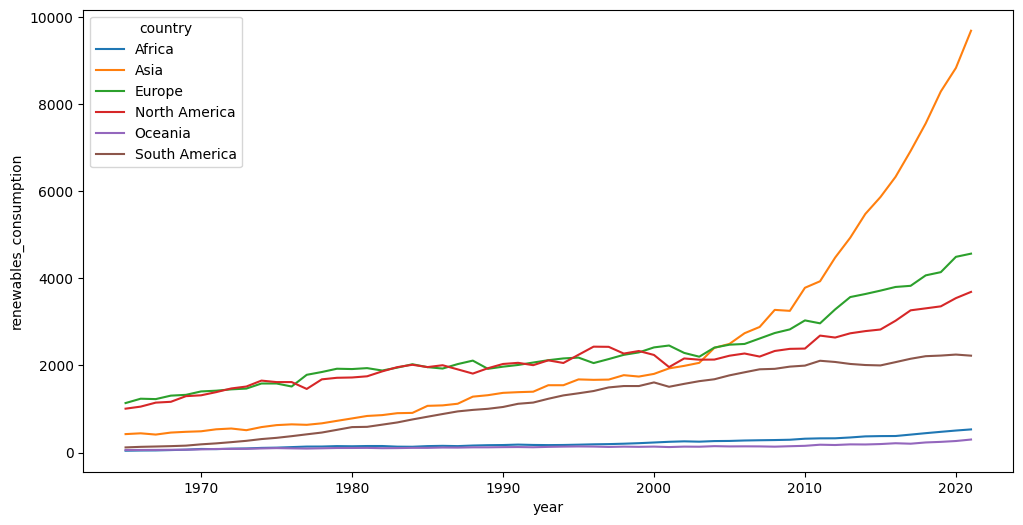

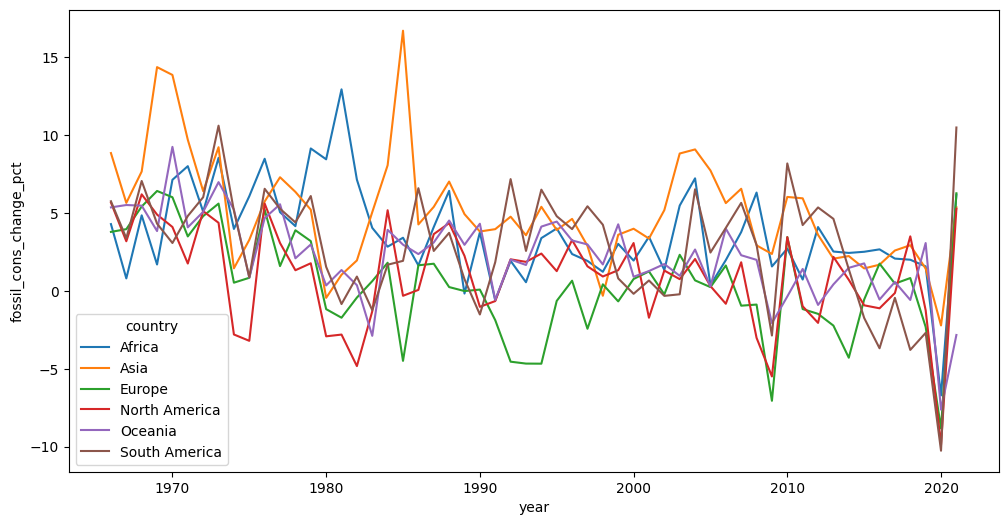

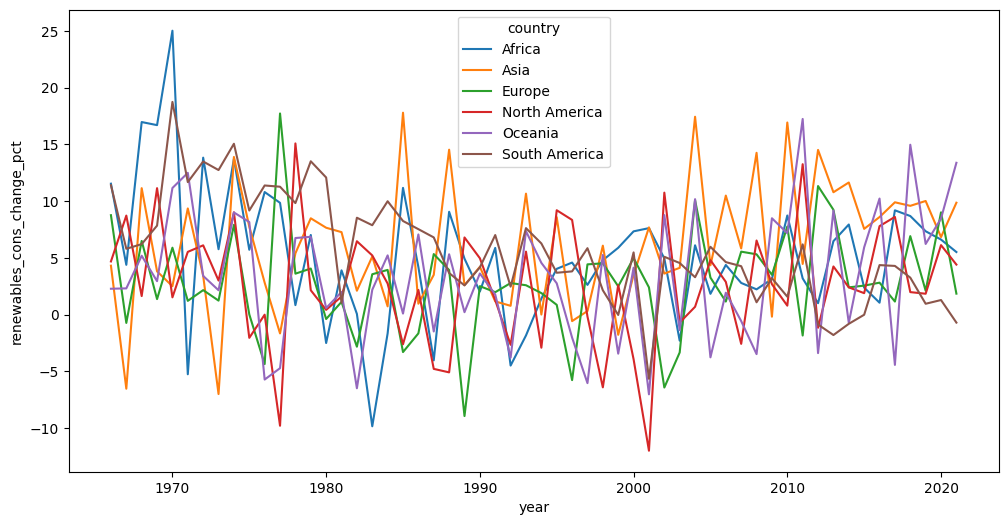

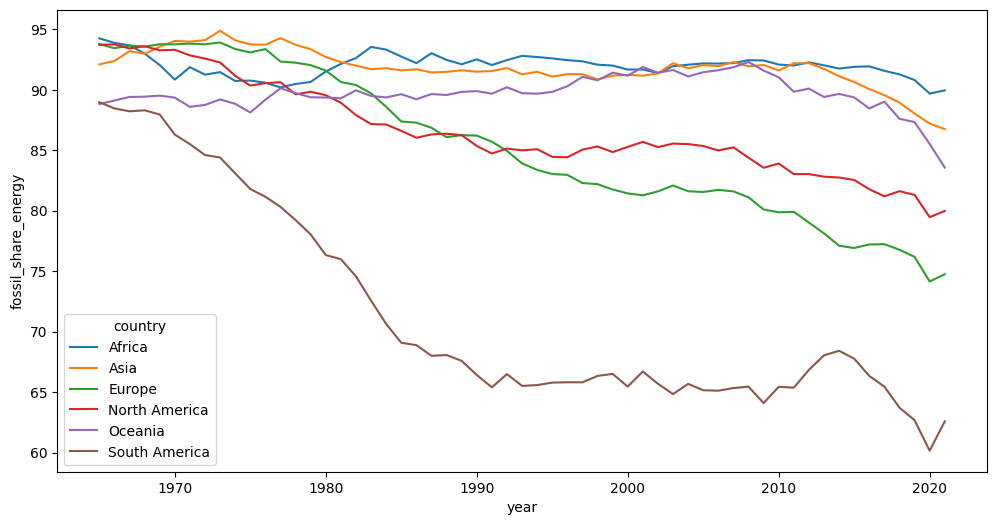

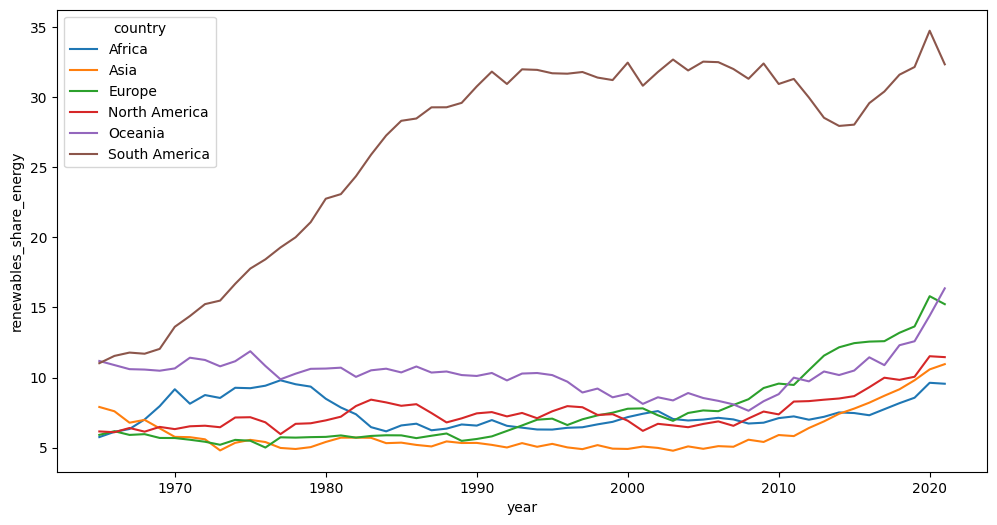

In [32]:
for metric in continent_metrics:
    figure = plt.figure(figsize=(12,6))
    sb.lineplot(data=continent_data, x = 'year', y = metric, hue = 'country')

## Data Cleaning - choropleths for countries (greenhouse gas emissions, fossil fuel consumption and renewables consumption)

In [34]:
# import plotly
import plotly.express as px


In [35]:
df1

,country,iso_code,year,population,gdp,greenhouse_gas_emissions,fossil_fuel_consumption,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,renewables_consumption,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,renewables_elec_per_capita,renewables_energy_per_capita
0,Afghanistan,AFG,1900,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1901,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1902,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1903,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1904,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,Zimbabwe,ZWE,2017,14751101.0,2.194784e+10,2.67,NaN,NaN,NaN,41.497,206.764,NaN,NaN,NaN,NaN,58.503,291.504,NaN
21886,Zimbabwe,ZWE,2018,15052191.0,2.271535e+10,3.27,NaN,NaN,NaN,40.588,247.804,NaN,NaN,NaN,NaN,59.412,362.738,NaN
21887,Zimbabwe,ZWE,2019,15354606.0,NaN,3.19,NaN,NaN,NaN,44.417,238.365,NaN,NaN,NaN,NaN,55.583,298.282,NaN
21888,Zimbabwe,ZWE,2020,15669663.0,NaN,2.96,NaN,NaN,NaN,44.868,217.618,NaN,NaN,NaN,NaN,55.132,267.396,NaN


In [41]:
# countries.csv is extracted from online where it contains ISO 3166-1 alpha-3 codes of 193 recognised countries
iso_codes = pd.read_csv('countries.csv')
alpha3 = iso_codes['alpha3'].apply(str.upper).unique()
len(alpha3)

193

In [40]:
iso_countries = df1[df1['iso_code'].isin(alpha3)]['iso_code'].unique()
len(iso_countries)

187

In [42]:
# make alpha3 into a dataframe (from a numpy array) to check for missing countries
df_alpha3 = pd.DataFrame(alpha3)

mis_countries = df_alpha3[~df_alpha3.isin(iso_countries)].dropna()
mis_countries

,0
3,AND
99,LIE
108,MHL
114,MCO
132,PLW
148,SMR


The officially recognised countries (based on ISO 3166-1 alpha3 codes) not included are: **Andorra, Liechtenstein, Marshall Islands, Monaco, Palau and San Marino**

We don't need to include their data as they are relatively small countries

In [45]:
# initialise countries dataframe for the 187 countries identified
country_data = df1[df1['iso_code'].isin(iso_countries)].copy()
country_data.head()

,country,iso_code,year,population,gdp,greenhouse_gas_emissions,fossil_fuel_consumption,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,renewables_consumption,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,renewables_elec_per_capita,renewables_energy_per_capita
0,Afghanistan,AFG,1900,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1901,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1902,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1903,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1904,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
country_data['log_pop'] = np.log10(country_data['population'])
country_data['log_gge'] = np.log10(country_data['greenhouse_gas_emissions'])
country_data

c:\Users\bklec\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log10



,country,iso_code,year,population,gdp,greenhouse_gas_emissions,fossil_fuel_consumption,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,renewables_consumption,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,renewables_elec_per_capita,renewables_energy_per_capita,log_pop,log_gge
0,Afghanistan,AFG,1900,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.684164,NaN
1,Afghanistan,AFG,1901,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.688392,NaN
2,Afghanistan,AFG,1902,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.693298,NaN
3,Afghanistan,AFG,1903,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.698871,NaN
4,Afghanistan,AFG,1904,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.704444,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,Zimbabwe,ZWE,2017,14751101.0,2.194784e+10,2.67,NaN,NaN,NaN,41.497,206.764,NaN,NaN,NaN,NaN,58.503,291.504,NaN,7.168824,0.426511
21886,Zimbabwe,ZWE,2018,15052191.0,2.271535e+10,3.27,NaN,NaN,NaN,40.588,247.804,NaN,NaN,NaN,NaN,59.412,362.738,NaN,7.177600,0.514548
21887,Zimbabwe,ZWE,2019,15354606.0,NaN,3.19,NaN,NaN,NaN,44.417,238.365,NaN,NaN,NaN,NaN,55.583,298.282,NaN,7.186239,0.503791
21888,Zimbabwe,ZWE,2020,15669663.0,NaN,2.96,NaN,NaN,NaN,44.868,217.618,NaN,NaN,NaN,NaN,55.132,267.396,NaN,7.195060,0.471292


In [160]:
# Create a dictionary to store the upper limits for each column
upper_limits = {}
country_metrics = ['population', 'greenhouse_gas_emissions', 'fossil_fuel_consumption', 'renewables_consumption', "fossil_elec_per_capita", 'renewables_elec_per_capita']

# Loop over each column and calculate the truncated mean and standard deviation
for column in country_metrics:
    country_data1 = country_data.dropna()
    threshold = np.percentile(country_data1[column], 70)
    truncated_data = country_data1[country_data1[column] <= threshold][column]
    truncated_mean = np.mean(truncated_data)
    truncated_std = np.std(truncated_data)

    # Set the upper limit for the color scale to be 3 standard deviations above the truncated mean
    upper_limits[column] = truncated_mean + 3 * truncated_std

upper_limits

{'population': 56486379.355955474,
 'greenhouse_gas_emissions': 66.25279728455635,
 'fossil_fuel_consumption': 1110.4960454025224,
 'renewables_consumption': 102.30340666101822,
 'fossil_elec_per_capita': 4817.690367598661,
 'renewables_elec_per_capita': 1434.5805224931373}

In [161]:
fig = px.choropleth(data_frame=country_data,
                    locations="iso_code",
                    color='population',
                    animation_frame='year',
                    color_continuous_scale='Reds',
                    center={"lat": 0, "lon": 0},
                    width = 1200,
                    height = 800,
                    range_color=(0,upper_limits['population']))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.show()

In [162]:
fig = px.choropleth(data_frame=country_data,
                    locations="iso_code",
                    color='greenhouse_gas_emissions',
                    animation_frame='year',
                    color_continuous_scale='Reds',
                    center={"lat": 0, "lon": 0},
                    width = 1200,
                    height = 800,
                    range_color=(0,upper_limits['greenhouse_gas_emissions']))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 150
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10
fig.show()

In [163]:
fig = px.choropleth(data_frame=country_data,
                    locations="iso_code",
                    color='fossil_elec_per_capita',
                    animation_frame='year',
                    color_continuous_scale='Reds',
                    center={"lat": 0, "lon": 0},
                    width = 1200,
                    height = 800,
                    range_color=(0,upper_limits['fossil_elec_per_capita']))
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 100
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10
fig.show()